In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from scipy import stats

¿Hay diferencia entre la corellacion de plas proipiedas con respecto al tipo de vida media que se esta analizando?
El modelo quiero utilizarlo para diseñar
¿Que tienen de interesante este set de datos?
Se describe para ppermitir encontrar reglas (si es que hay), permite entender si se puede utilizar para guiar un diseño racional eficiente y/o explicar

In [71]:
def graph_func(corr_matrix, name):
    fig, ax = plt.subplots(figsize=(16, 14))

    #Cambiar el estilo de la visualización
    sns.heatmap(
        corr_matrix, annot=True, fmt=".1f", cmap="Blues", vmin=-1, vmax=1, center=0,
        cbar_kws={'label': 'Correlación', 'shrink': 0.8},
        annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'},
        linewidths=0.5, linecolor='white',
        square=True,
        xticklabels=True, yticklabels=True,
        mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
        ax=ax 
    )

    # Títulos y etiquetas
    ax.set_title(f'Matriz de Correlación - {name}', fontsize=18, weight='bold')
    ax.set_xlabel('Variables', fontsize=14, weight='bold')
    ax.set_ylabel('Variables', fontsize=14, weight='bold')

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # Evita que se corten las etiquetas
    plt.tight_layout()

    plt.savefig(f"../../img/antiviral/stat/correlation_heatmap_{name.lower()}.png", dpi=300)

    # Mostrar el gráfico
    plt.show()

In [72]:
def corr_func(df, name, target):
    corr_matrix = df.corr(method='pearson', numeric_only=True)
    corr_matrix.drop(target, axis=0, inplace=True)
    corr_matrix.drop(target, axis=1, inplace=True)
    graph_func(corr_matrix, name)
    return corr_matrix

In [73]:
df_all=pd.read_csv('../../data/described/described_antiviral_homology_90.csv')

In [74]:
df_all.shape

(1313, 34)

In [75]:
df_all

sequence  \
0                                         AAAMSQVTN   
1                      AACEVAKNLNESLIDLQELGKYEQYIKW   
2                                         AAGAVVNDL   
3     AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA   
4                             AAKAWKKAKAWKKAKWWKKAA   
...                                             ...   
1308                           YVREHGVPIHADKYFEQVLK   
1309                             YWILEYLWKVPFDFWRGV   
1310                             YWILEYLWKVPFDFWRGV   
1311                             YWILEYLWKVPFDFWRGV   
1312                                      YAGAVVNDL   

     experimental_characteristics  half_life_seconds  length_sequence  target  \
0                       Mammalian            15840.0                9       1   
1                       Mammalian            15840.0               28       1   
2                       Mammalian            15840.0                9       1   
3                       Mammalian            15840.0               45       1   
4                       Mammalian            15840.0               21       1   
...                           ...                ...              ...     ...   
1308                    Mammalian            10080.0               20       1   
1309                       E_coli             7200.0               18       0   
1310                    Mammalian            10080.0               18       1   
1311                        Yeast            36000.0               18       2   
1312                       E_coli             7200.0                9       0   

      Molecular Weight  Isoelectric point  Charge density  Charge  \
0               891.01            12.2500         0.00112   0.996   
1              3268.71             4.6846        -0.00033  -1.068   
2               827.93             6.5000        -0.00000  -0.004   
3              4779.56            10.1865         0.00046   2.194   
4              2484.06            13.3125         0.00402   9.994   
...                ...                ...             ...     ...   
1308           2427.77             9.4360         0.00049   1.195   
1309           2416.82             9.4746         0.00041   0.996   
1310           2416.82             9.4746         0.00041   0.996   
1311           2416.82             9.4746         0.00041   0.996   
1312            920.03             6.5000        -0.00000  -0.004   

      Instability index  ...  freq_L  freq_M  freq_P  freq_Q  freq_R  freq_S  \
0               44.6000  ...  0.0000  0.1111  0.0000  0.1111  0.0000  0.1111   
1               46.1643  ...  0.1429  0.0000  0.0000  0.0714  0.0000  0.0357   
2               -0.5444  ...  0.1111  0.0000  0.0000  0.0000  0.0000  0.0000   
3               58.3624  ...  0.1556  0.0000  0.0667  0.0222  0.0667  0.0444   
4                9.5238  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
...                 ...  ...     ...     ...     ...     ...     ...     ...   
1308             9.4700  ...  0.0500  0.0000  0.0500  0.0500  0.0500  0.0000   
1309            42.1722  ...  0.1111  0.0000  0.0556  0.0000  0.0556  0.0000   
1310            42.1722  ...  0.1111  0.0000  0.0556  0.0000  0.0556  0.0000   
1311            42.1722  ...  0.1111  0.0000  0.0556  0.0000  0.0556  0.0000   
1312            25.7667  ...  0.1111  0.0000  0.0000  0.0000  0.0000  0.0000   

      freq_T  freq_V  freq_W  freq_Y  
0     0.1111  0.1111  0.0000  0.0000  
1     0.0000  0.0357  0.0357  0.0714  
2     0.0000  0.2222  0.0000  0.0000  
3     0.0444  0.1111  0.0000  0.0444  
4     0.0000  0.0000  0.1905  0.0000  
...      ...     ...     ...     ...  
1308  0.0000  0.1500  0.0000  0.1000  
1309  0.0000  0.1111  0.1667  0.1111  
1310  0.0000  0.1111  0.1667  0.1111  
1311  0.0000  0.1111  0.1667  0.1111  
1312  0.0000  0.2222  0.0000  0.1111  

[1313 rows x 34 columns]

In [76]:
df_all=df_all.drop(columns=['half_life_seconds', 'length_sequence', 'experimental_characteristics'], axis=1)

In [77]:
df_high = df_all[df_all['target'] == 2]
df_mid = df_all[df_all['target'] == 1]
df_low = df_all[df_all['target'] == 0]

In [78]:
datasets = {'High': df_high, 'Medium': df_mid, 'Low': df_low}

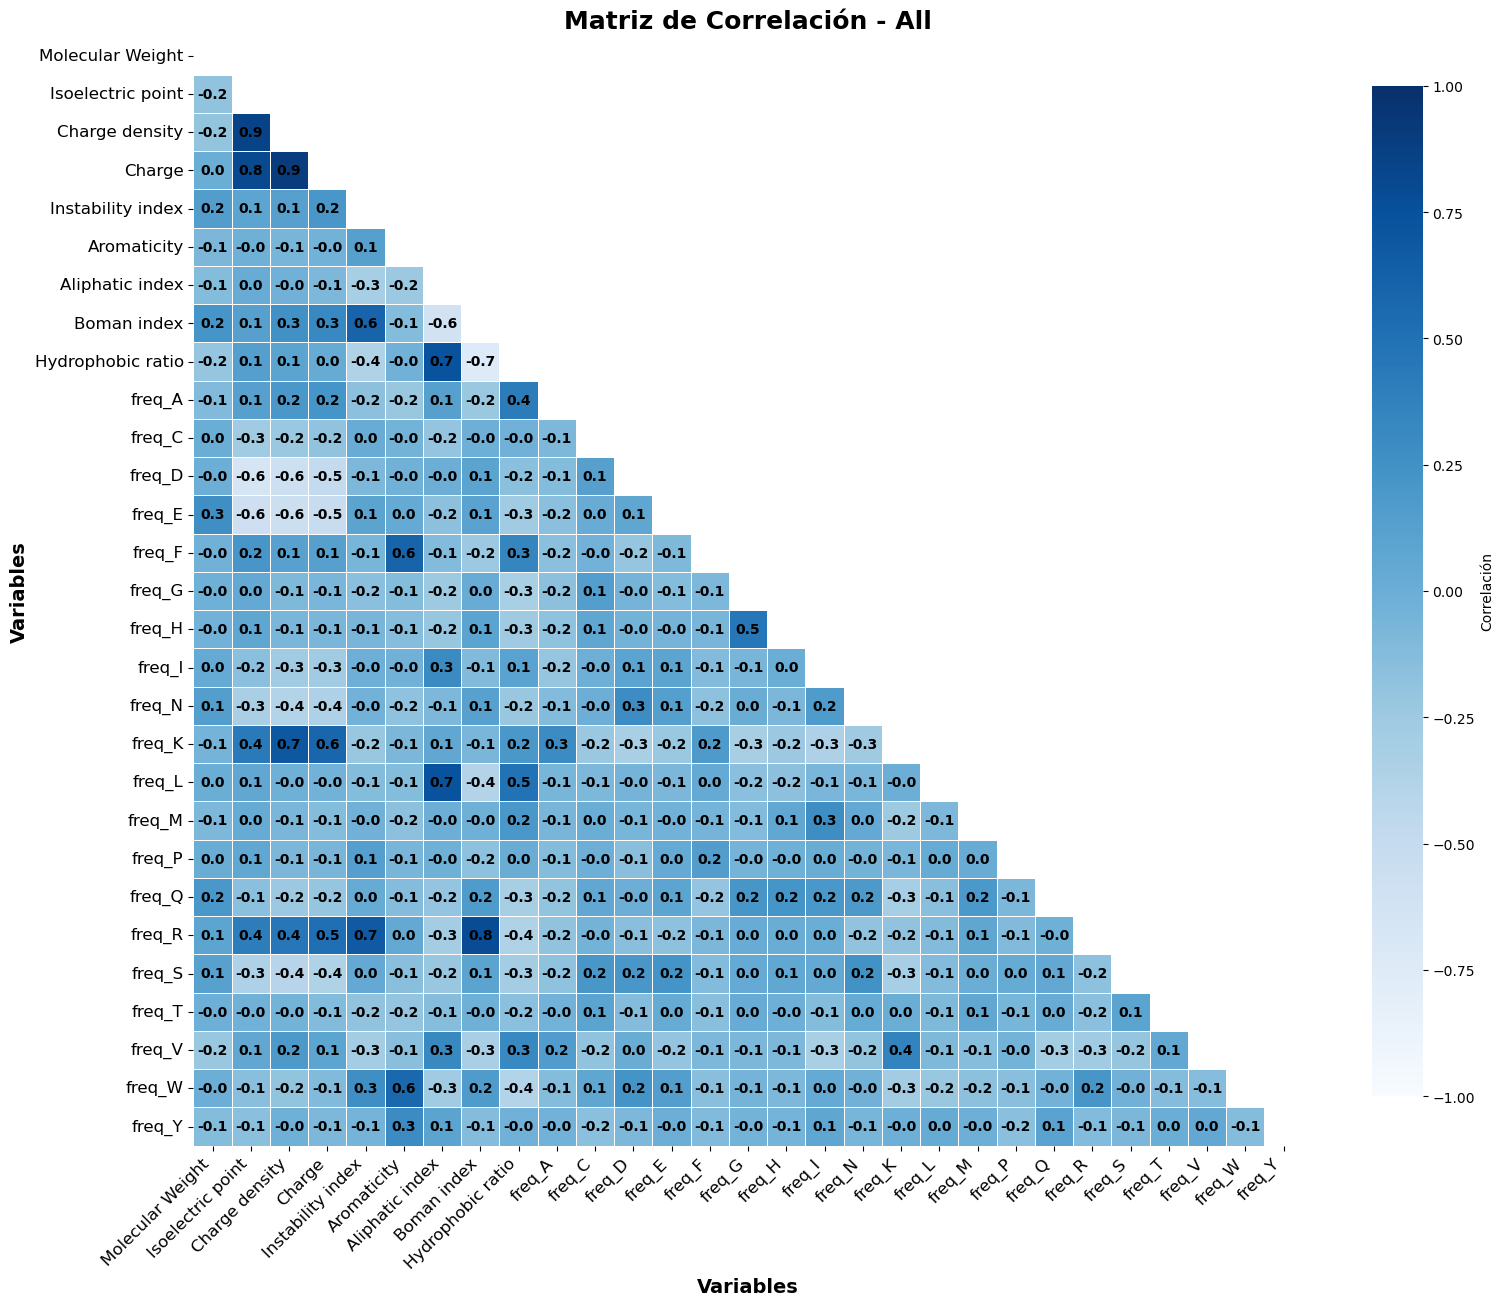

Molecular Weight  Isoelectric point  Charge density  \
Molecular Weight           1.000000          -0.181239       -0.194151   
Isoelectric point         -0.181239           1.000000        0.851992   
Charge density            -0.194151           0.851992        1.000000   
Charge                     0.002626           0.805549        0.900769   
Instability index          0.153388           0.078196        0.123502   
Aromaticity               -0.078895          -0.016075       -0.062461   
Aliphatic index           -0.124717           0.020211       -0.026354   
Boman index                0.221313           0.117816        0.254889   
Hydrophobic ratio         -0.207459           0.138214        0.086050   
freq_A                    -0.104198           0.121825        0.202134   
freq_C                     0.002975          -0.267437       -0.229278   
freq_D                    -0.000748          -0.649726       -0.575085   
freq_E                     0.267473          -0.562862       -0.554949   
freq_F                    -0.028527           0.210979        0.114542   
freq_G                    -0.021457           0.046207       -0.098875   
freq_H                    -0.038396           0.071972       -0.077768   
freq_I                     0.031867          -0.151356       -0.269965   
freq_N                     0.143312          -0.327164       -0.381563   
freq_K                    -0.050579           0.431491        0.688895   
freq_L                     0.002999           0.061734       -0.015737   
freq_M                    -0.091072           0.023667       -0.072649   
freq_P                     0.009503           0.063102       -0.083742   
freq_Q                     0.201835          -0.148634       -0.235278   
freq_R                     0.081456           0.411952        0.445600   
freq_S                     0.111343          -0.346447       -0.400224   
freq_T                    -0.011463          -0.028808       -0.039180   
freq_V                    -0.225684           0.056012        0.185365   
freq_W                    -0.002673          -0.142000       -0.187910   
freq_Y                    -0.118570          -0.148985       -0.021517   

                     Charge  Instability index  Aromaticity  Aliphatic index  \
Molecular Weight   0.002626           0.153388    -0.078895        -0.124717   
Isoelectric point  0.805549           0.078196    -0.016075         0.020211   
Charge density     0.900769           0.123502    -0.062461        -0.026354   
Charge             1.000000           0.208675    -0.031948        -0.092066   
Instability index  0.208675           1.000000     0.131714        -0.303543   
Aromaticity       -0.031948           0.131714     1.000000        -0.240891   
Aliphatic index   -0.092066          -0.303543    -0.240891         1.000000   
Boman index        0.327615           0.594905    -0.118879        -0.616437   
Hydrophobic ratio  0.029746          -0.366917    -0.028407         0.735363   
freq_A             0.221866          -0.161690    -0.218755         0.122194   
freq_C            -0.183145           0.016989    -0.039906        -0.201193   
freq_D            -0.488076          -0.093086    -0.028635        -0.002888   
freq_E            -0.514623           0.090799     0.031702        -0.163954   
freq_F             0.117445          -0.057245     0.593899        -0.112145   
freq_G            -0.074144          -0.150103    -0.124557        -0.248665   
freq_H            -0.075474          -0.064461    -0.140359        -0.216223   
freq_I            -0.261365          -0.013872    -0.024019         0.297719   
freq_N            -0.354318          -0.037236    -0.173780        -0.091640   
freq_K             0.583485          -0.224187    -0.078702         0.058591   
freq_L            -0.038514          -0.124402    -0.120723         0.740537   
freq_M            -0.118962          -0.026136    -0.158680        -0.003604   
freq_P            -0.065672           

In [79]:
corr_func(df_all, 'All', 'target')

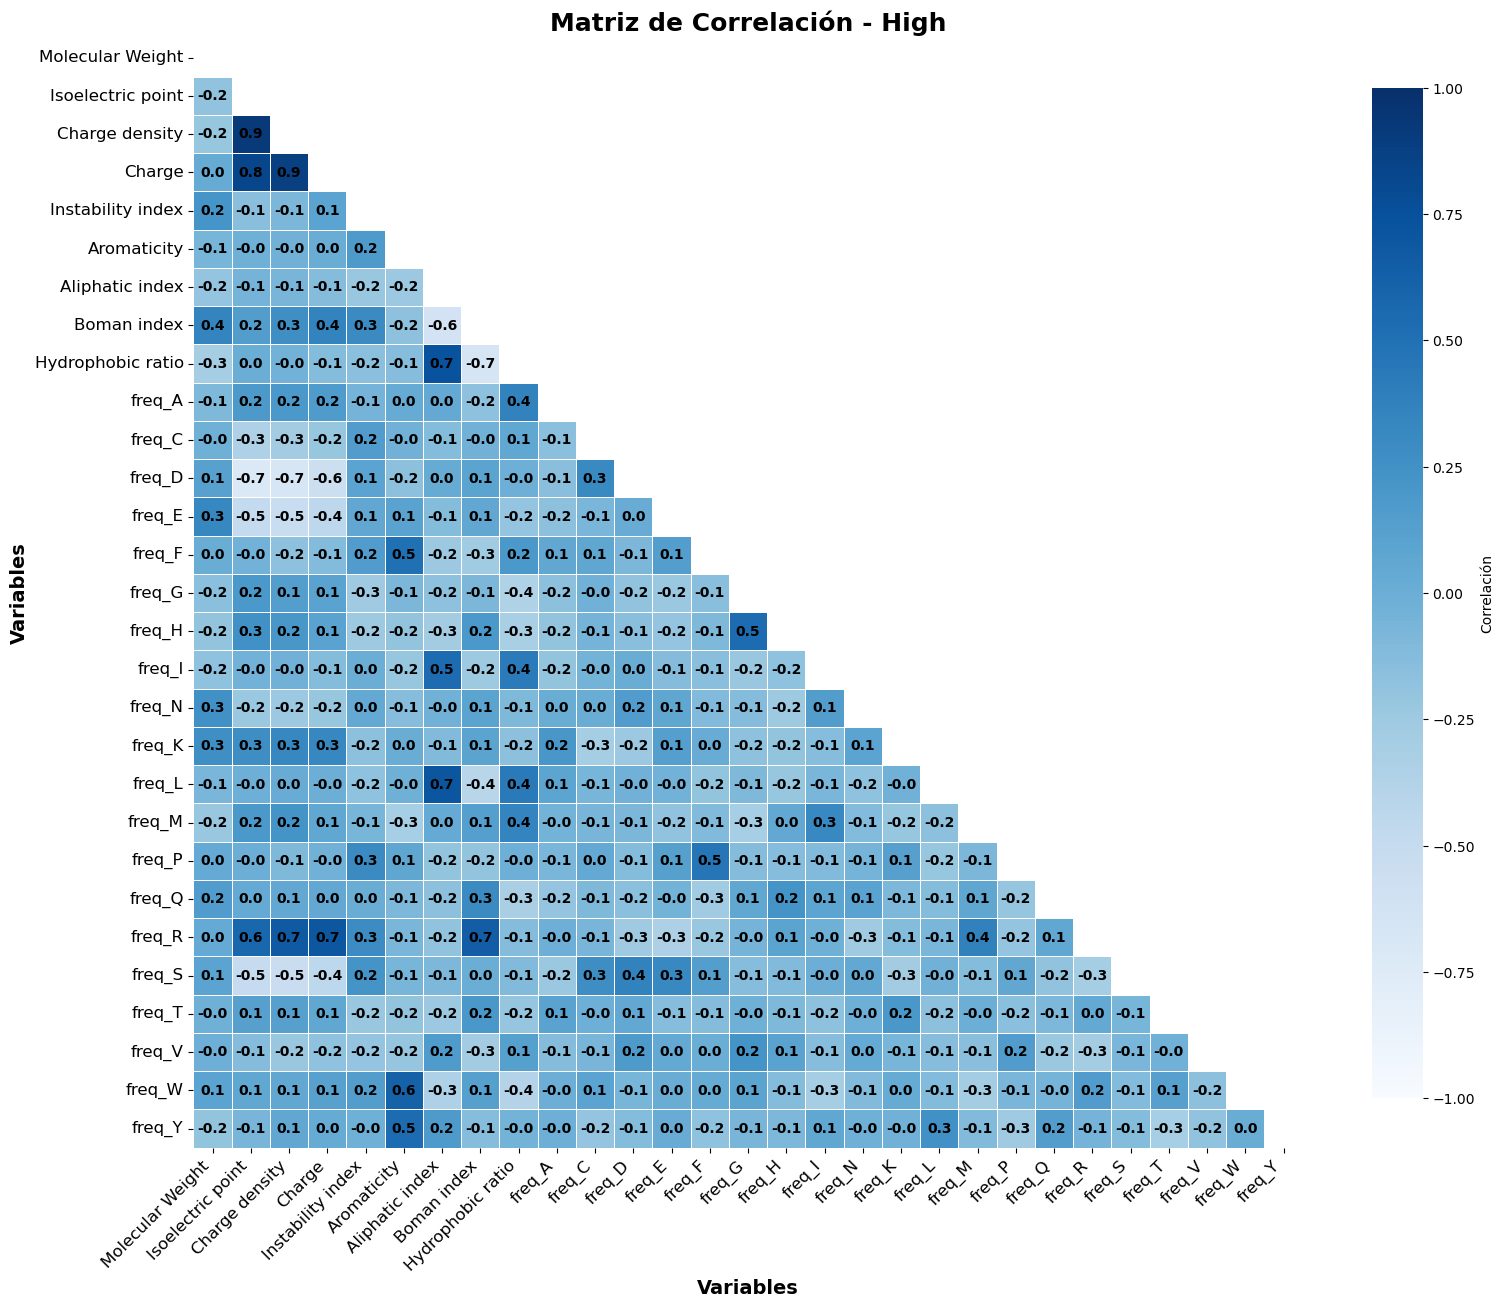

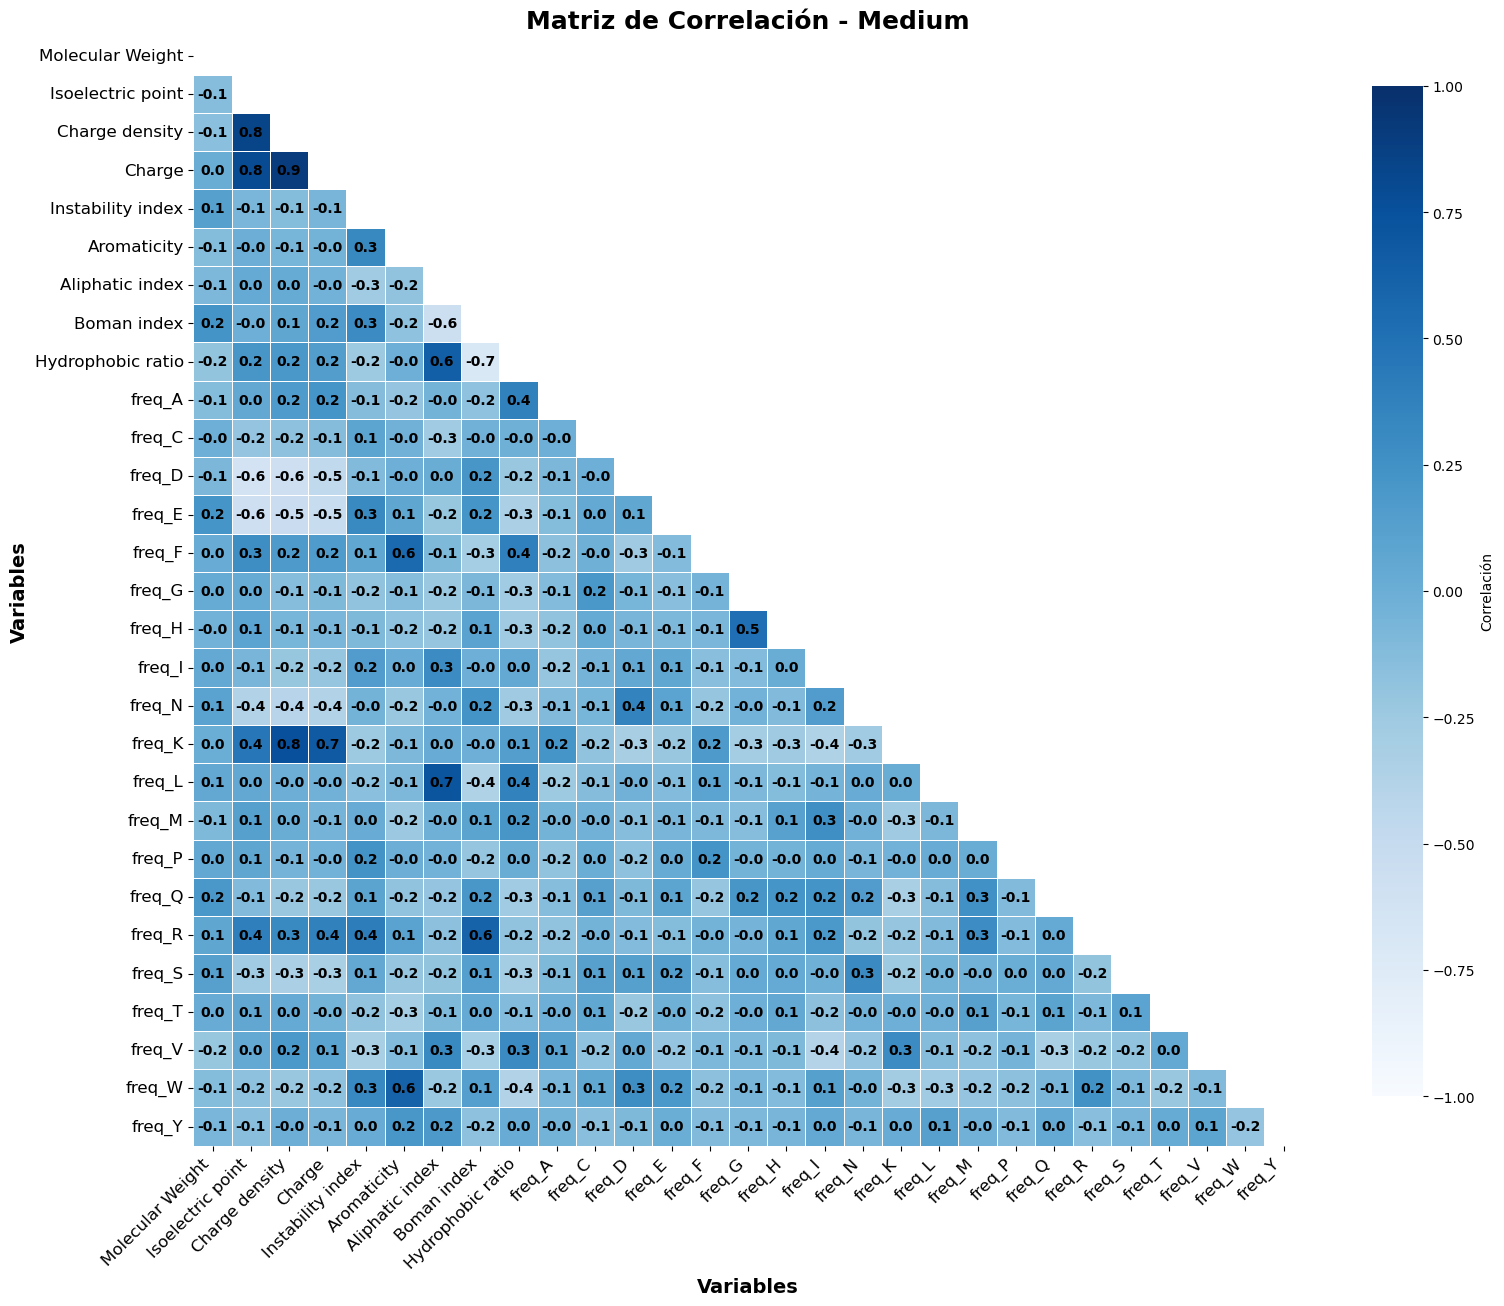

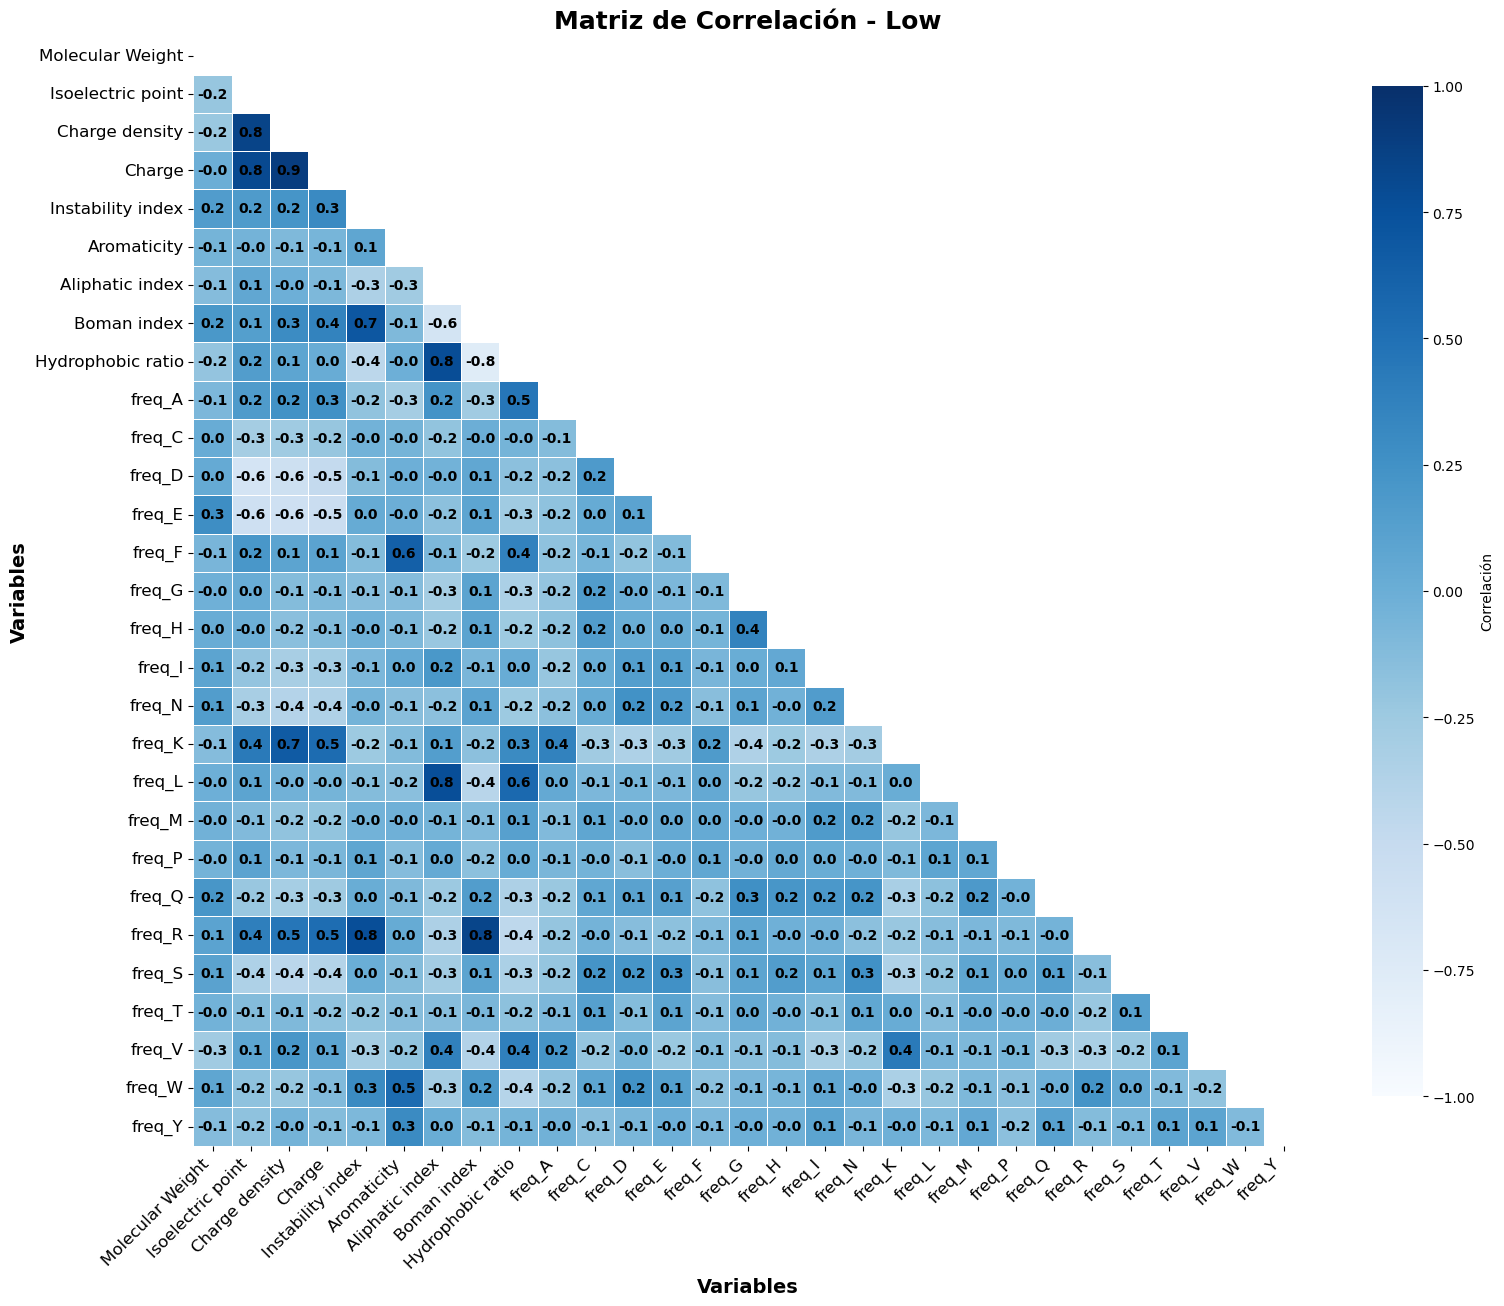

In [80]:
data_corr={}
for name, df in datasets.items():
    data_corr[name]=corr_func(df, name,'target')

In [81]:
data_rest = {}

In [82]:
for name1, name2 in combinations(data_corr.keys(), 2):  
    data_rest[f"{name1}_vs_{name2}"] = data_corr[name1] - data_corr[name2]

Tiene que ser valor absoluto? porque high vs medium no es lo mismo que medium vs high

In [83]:
df_hvsm = pd.DataFrame(data_rest['High_vs_Medium'])
df_hvsl = pd.DataFrame(data_rest['High_vs_Low'])
df_mvsl = pd.DataFrame(data_rest['Medium_vs_Low'])

In [84]:
df_hvsm

Molecular Weight  Isoelectric point  Charge density  \
Molecular Weight           0.000000          -0.040646       -0.062259   
Isoelectric point         -0.040646           0.000000        0.072193   
Charge density            -0.062259           0.072193        0.000000   
Charge                     0.012442           0.041120       -0.023343   
Instability index          0.095164          -0.071460        0.039018   
Aromaticity                0.060023          -0.021960        0.026851   
Aliphatic index           -0.105977          -0.089266       -0.089656   
Boman index                0.127940           0.160352        0.190362   
Hydrophobic ratio         -0.107107          -0.214353       -0.238766   
freq_A                     0.023290           0.133274        0.023263   
freq_C                    -0.011339          -0.149583       -0.111067   
freq_D                     0.191448          -0.085960       -0.096629   
freq_E                     0.111279           0.077955        0.012798   
freq_F                    -0.007555          -0.307592       -0.339561   
freq_G                    -0.182074           0.163673        0.281114   
freq_H                    -0.159707           0.149763        0.267693   
freq_I                    -0.221096           0.033756        0.186401   
freq_N                     0.148716           0.142457        0.158710   
freq_K                     0.263593          -0.167970       -0.421509   
freq_L                    -0.127579          -0.057129        0.017297   
freq_M                    -0.127398           0.067890        0.213231   
freq_P                    -0.011380          -0.082195       -0.044660   
freq_Q                    -0.034003           0.138358        0.274065   
freq_R                    -0.041850           0.178695        0.371998   
freq_S                    -0.020813          -0.231044       -0.208586   
freq_T                    -0.041577           0.062792        0.088848   
freq_V                     0.208144          -0.169549       -0.414372   
freq_W                     0.216997           0.237002        0.283330   
freq_Y                    -0.116156           0.078100        0.059945   

                     Charge  Instability index  Aromaticity  Aliphatic index  \
Molecular Weight   0.012442           0.095164     0.060023        -0.105977   
Isoelectric point  0.041120          -0.071460    -0.021960        -0.089266   
Charge density    -0.023343           0.039018     0.026851        -0.089656   
Charge             0.000000           0.164354     0.055792        -0.094441   
Instability index  0.164354           0.000000    -0.145240         0.034410   
Aromaticity        0.055792          -0.145240     0.000000        -0.056754   
Aliphatic index   -0.094441           0.034410    -0.056754         0.000000   
Boman index        0.203907           0.009359     0.011473        -0.068081   
Hydrophobic ratio -0.279912           0.092965    -0.130329         0.103751   
freq_A            -0.052227           0.075030     0.226880         0.088819   
freq_C            -0.081486           0.082066     0.001117         0.140064   
freq_D            -0.090076           0.207024    -0.150281         0.014498   
freq_E             0.066677          -0.250059     0.032595         0.094036   
freq_F            -0.287290           0.096971    -0.056301        -0.138937   
freq_G             0.203169          -0.073345     0.054187         0.068347   
freq_H             0.180135          -0.145212    -0.014247        -0.072059   
freq_I             0.083206          -0.156512    -0.236172         0.249299   
freq_N             0.161981           0.084126     0.081401         0.009272   
freq_K            -0.343533           0.087310     0.102048        -0.120565   
freq_L             0.021355          -0.028518     0.067805        -0.006999   
freq_M             0.120799          -0.077222    -0.060748         0.052279   
freq_P             0.006729           

In [85]:
df_hvsl

Molecular Weight  Isoelectric point  Charge density  \
Molecular Weight           0.000000           0.033407        0.017702   
Isoelectric point          0.033407           0.000000        0.074146   
Charge density             0.017702           0.074146        0.000000   
Charge                     0.031685           0.024127       -0.012995   
Instability index          0.066387          -0.307458       -0.300777   
Aromaticity               -0.003513           0.016514        0.068683   
Aliphatic index           -0.070652          -0.105246       -0.052142   
Boman index                0.152274           0.013519       -0.024004   
Hydrophobic ratio         -0.096777          -0.149554       -0.120803   
freq_A                    -0.011554           0.012693       -0.056654   
freq_C                    -0.039304          -0.054878       -0.017599   
freq_D                     0.073835          -0.064527       -0.095469   
freq_E                     0.053297           0.095419        0.057372   
freq_F                     0.076176          -0.241579       -0.259953   
freq_G                    -0.130723           0.176008        0.269100   
freq_H                    -0.215979           0.252917        0.360053   
freq_I                    -0.268257           0.169259        0.278642   
freq_N                     0.105235           0.082009        0.143562   
freq_K                     0.394596          -0.153899       -0.332896   
freq_L                    -0.064580          -0.099733        0.040107   
freq_M                    -0.200265           0.297417        0.408557   
freq_P                     0.078501          -0.107563       -0.019688   
freq_Q                    -0.054893           0.257430        0.354956   
freq_R                    -0.063010           0.175982        0.216933   
freq_S                    -0.009449          -0.146909       -0.116647   
freq_T                     0.019610           0.248094        0.222369   
freq_V                     0.264713          -0.214751       -0.435721   
freq_W                     0.022828           0.238651        0.274008   
freq_Y                    -0.064635           0.112351        0.097539   

                     Charge  Instability index  Aromaticity  Aliphatic index  \
Molecular Weight   0.031685           0.066387    -0.003513        -0.070652   
Isoelectric point  0.024127          -0.307458     0.016514        -0.105246   
Charge density    -0.012995          -0.300777     0.068683        -0.052142   
Charge             0.000000          -0.214435     0.066173        -0.040865   
Instability index -0.214435           0.000000     0.100218         0.112225   
Aromaticity        0.066173           0.100218     0.000000         0.030473   
Aliphatic index   -0.040865           0.112225     0.030473         0.000000   
Boman index        0.000681          -0.391986    -0.067279         0.009815   
Hydrophobic ratio -0.145995           0.284618    -0.124331        -0.036478   
freq_A            -0.082884           0.134285     0.320522        -0.195084   
freq_C             0.002286           0.194569     0.026050         0.072911   
freq_D            -0.063206           0.219649    -0.150411         0.063656   
freq_E             0.090312           0.030999     0.106958         0.032530   
freq_F            -0.213116           0.284395    -0.122273        -0.150916   
freq_G             0.200183          -0.121877     0.047478         0.131825   
freq_H             0.215169          -0.226662    -0.097036        -0.049854   
freq_I             0.158799           0.085471    -0.245833         0.335841   
freq_N             0.142948           0.081321     0.007908         0.132921   
freq_K            -0.203804           0.086945     0.127477        -0.244471   
freq_L             0.043682          -0.056080     0.135600        -0.064191   
freq_M             0.260181          -0.020403    -0.279647         0.083896   
freq_P             0.044461           

In [86]:
df_mvsl

Molecular Weight  Isoelectric point  Charge density  \
Molecular Weight           0.000000           0.074053        0.079960   
Isoelectric point          0.074053           0.000000        0.001953   
Charge density             0.079960           0.001953        0.000000   
Charge                     0.019243          -0.016993        0.010349   
Instability index         -0.028777          -0.235997       -0.339796   
Aromaticity               -0.063536           0.038474        0.041832   
Aliphatic index            0.035325          -0.015980        0.037514   
Boman index                0.024334          -0.146833       -0.214366   
Hydrophobic ratio          0.010329           0.064799        0.117963   
freq_A                    -0.034844          -0.120581       -0.079917   
freq_C                    -0.027965           0.094705        0.093468   
freq_D                    -0.117612           0.021433        0.001160   
freq_E                    -0.057982           0.017464        0.044573   
freq_F                     0.083731           0.066013        0.079608   
freq_G                     0.051351           0.012335       -0.012015   
freq_H                    -0.056272           0.103155        0.092360   
freq_I                    -0.047161           0.135503        0.092241   
freq_N                    -0.043481          -0.060448       -0.015148   
freq_K                     0.131004           0.014072        0.088613   
freq_L                     0.062998          -0.042603        0.022810   
freq_M                    -0.072867           0.229528        0.195326   
freq_P                     0.089881          -0.025367        0.024972   
freq_Q                    -0.020890           0.119072        0.080891   
freq_R                    -0.021159          -0.002713       -0.155066   
freq_S                     0.011364           0.084135        0.091939   
freq_T                     0.061188           0.185302        0.133521   
freq_V                     0.056569          -0.045202       -0.021348   
freq_W                    -0.194169           0.001649       -0.009322   
freq_Y                     0.051521           0.034251        0.037594   

                     Charge  Instability index  Aromaticity  Aliphatic index  \
Molecular Weight   0.019243          -0.028777    -0.063536         0.035325   
Isoelectric point -0.016993          -0.235997     0.038474        -0.015980   
Charge density     0.010349          -0.339796     0.041832         0.037514   
Charge             0.000000          -0.378789     0.010381         0.053576   
Instability index -0.378789           0.000000     0.245458         0.077816   
Aromaticity        0.010381           0.245458     0.000000         0.087227   
Aliphatic index    0.053576           0.077816     0.087227         0.000000   
Boman index       -0.203226          -0.401346    -0.078751         0.077897   
Hydrophobic ratio  0.133917           0.191653     0.005998        -0.140229   
freq_A            -0.030656           0.059255     0.093642        -0.283903   
freq_C             0.083772           0.112503     0.024933        -0.067153   
freq_D             0.026870           0.012625    -0.000129         0.049158   
freq_E             0.023635           0.281058     0.074363        -0.061505   
freq_F             0.074174           0.187423    -0.065971        -0.011979   
freq_G            -0.002986          -0.048531    -0.006709         0.063479   
freq_H             0.035034          -0.081450    -0.082789         0.022205   
freq_I             0.075593           0.241983    -0.009661         0.086542   
freq_N            -0.019033          -0.002805    -0.073493         0.123649   
freq_K             0.139728          -0.000365     0.025429        -0.123906   
freq_L             0.022328          -0.027562     0.067795        -0.057193   
freq_M             0.139381           0.056818    -0.218899         0.031618   
freq_P             0.037732           

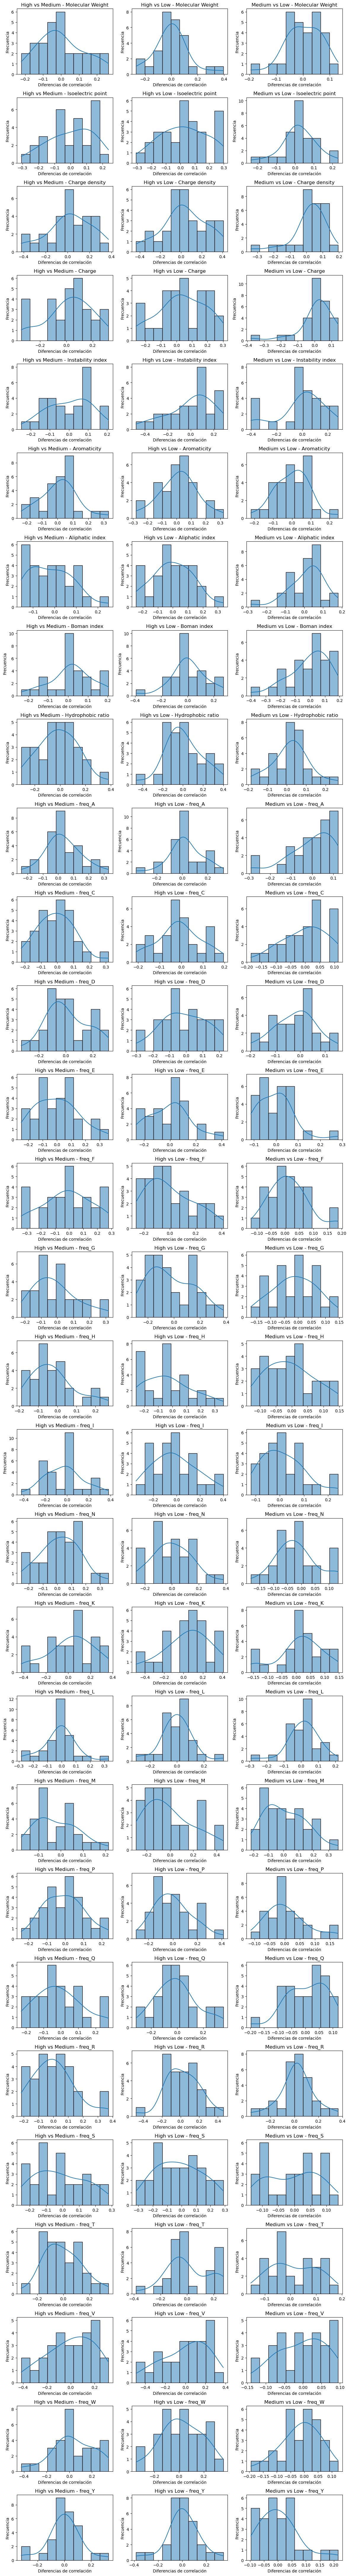

In [87]:
dfs = [df_hvsm, df_hvsl, df_mvsl]
titles = ["High vs Medium", "High vs Low", "Medium vs Low"]

# Obtener las columnas numéricas para graficar
numeric_cols = df_hvsm.select_dtypes(include=['number']).columns  

# Crear la figura con subgráficos
fig, axes = plt.subplots(len(numeric_cols), 3, figsize=(12, len(numeric_cols) * 3), sharex=False)

for col_idx, col in enumerate(numeric_cols):
    for df_idx, (df, title) in enumerate(zip(dfs, titles)):
        ax = axes[col_idx, df_idx] if len(numeric_cols) > 1 else axes[df_idx]
        
        # Crear un histograma con displot para cada columna y DataFrame
        sns.histplot(df[col], bins=10, kde=True, ax=ax)
        ax.set_title(f"{title} - {col}")
        ax.set_ylabel("Frecuencia")
        ax.set_xlabel("Diferencias de correlación")

# Ajustar diseño
plt.tight_layout()
plt.savefig(f"../../img/antiviral/stat/correlation_diference.png", dpi=300)
plt.show()

In [88]:
def quantile_funct(atr, r1, r2, threshold):
    Q1 = atr.quantile(r1)
    Q3 = atr.quantile(r2)
    IQR = Q3 - Q1

    out = atr[(atr < Q1 - threshold * IQR) | (atr > Q3 + threshold * IQR)]
    return out

In [89]:
all_results = []

In [90]:
for name, df in data_rest.items():
    print(f"Dataset: {name}")
    outliers = quantile_funct(df, 0.25, 0.75, 1.5)
    #Lo siguiente mueve las columnas a indices
    ser=outliers.stack().reset_index()
    ser.columns=['index', 'column', 'value']
    ser = ser.assign(name=name)
    all_results.append(ser)
all_results = pd.concat(all_results, ignore_index=True)

Dataset: High_vs_Medium
Dataset: High_vs_Low
Dataset: Medium_vs_Low


In [91]:
all_results['value'] = all_results['value'].round(3)
all_results

index             column  value            name
0      Charge density             freq_G  0.281  High_vs_Medium
1      Charge density             freq_H  0.268  High_vs_Medium
2      Charge density             freq_R  0.372  High_vs_Medium
3         Aromaticity             freq_Y  0.331  High_vs_Medium
4   Hydrophobic ratio             freq_I  0.382  High_vs_Medium
..                ...                ...    ...             ...
69             freq_R  Instability index -0.362   Medium_vs_Low
70             freq_R  Hydrophobic ratio  0.265   Medium_vs_Low
71             freq_V             freq_K -0.140   Medium_vs_Low
72             freq_W   Molecular Weight -0.194   Medium_vs_Low
73             freq_Y             freq_L  0.215   Medium_vs_Low

[74 rows x 4 columns]

In [92]:
values=[]

In [93]:
for i in range(len(all_results)):
    index_val = all_results['index'].iloc[i]
    column_val = all_results['column'].iloc[i] 
    for name, df in data_rest.items():
        if index_val in df.index and column_val in df.columns:
            values.append({"dataset": name, "atribute1": index_val, "atribute2": column_val, "value": df.loc[index_val, column_val]})

In [94]:
df_values = pd.DataFrame(values)
df_values['value'] = df_values['value'].round(3)
df_values

dataset       atribute1         atribute2  value
0    High_vs_Medium  Charge density            freq_G  0.281
1       High_vs_Low  Charge density            freq_G  0.269
2     Medium_vs_Low  Charge density            freq_G -0.012
3    High_vs_Medium  Charge density            freq_H  0.268
4       High_vs_Low  Charge density            freq_H  0.360
..              ...             ...               ...    ...
217     High_vs_Low          freq_W  Molecular Weight  0.023
218   Medium_vs_Low          freq_W  Molecular Weight -0.194
219  High_vs_Medium          freq_Y            freq_L  0.127
220     High_vs_Low          freq_Y            freq_L  0.343
221   Medium_vs_Low          freq_Y            freq_L  0.215

[222 rows x 4 columns]

In [95]:
df_values['sorted_attributes'] = df_values.apply(lambda row: tuple(sorted([row['atribute1'], row['atribute2']])), axis=1)
df_values.drop_duplicates(subset=['sorted_attributes', 'dataset', 'value'], inplace=True)
df_values.drop(columns=['sorted_attributes'], inplace=True)  # Eliminar la columna auxiliar
df_values.reset_index(drop=True, inplace=True)
df_values

dataset       atribute1 atribute2  value
0    High_vs_Medium  Charge density    freq_G  0.281
1       High_vs_Low  Charge density    freq_G  0.269
2     Medium_vs_Low  Charge density    freq_G -0.012
3    High_vs_Medium  Charge density    freq_H  0.268
4       High_vs_Low  Charge density    freq_H  0.360
..              ...             ...       ...    ...
151     High_vs_Low          freq_R    Charge  0.171
152   Medium_vs_Low          freq_R    Charge -0.149
153  High_vs_Medium          freq_V    freq_K -0.351
154     High_vs_Low          freq_V    freq_K -0.492
155   Medium_vs_Low          freq_V    freq_K -0.140

[156 rows x 4 columns]

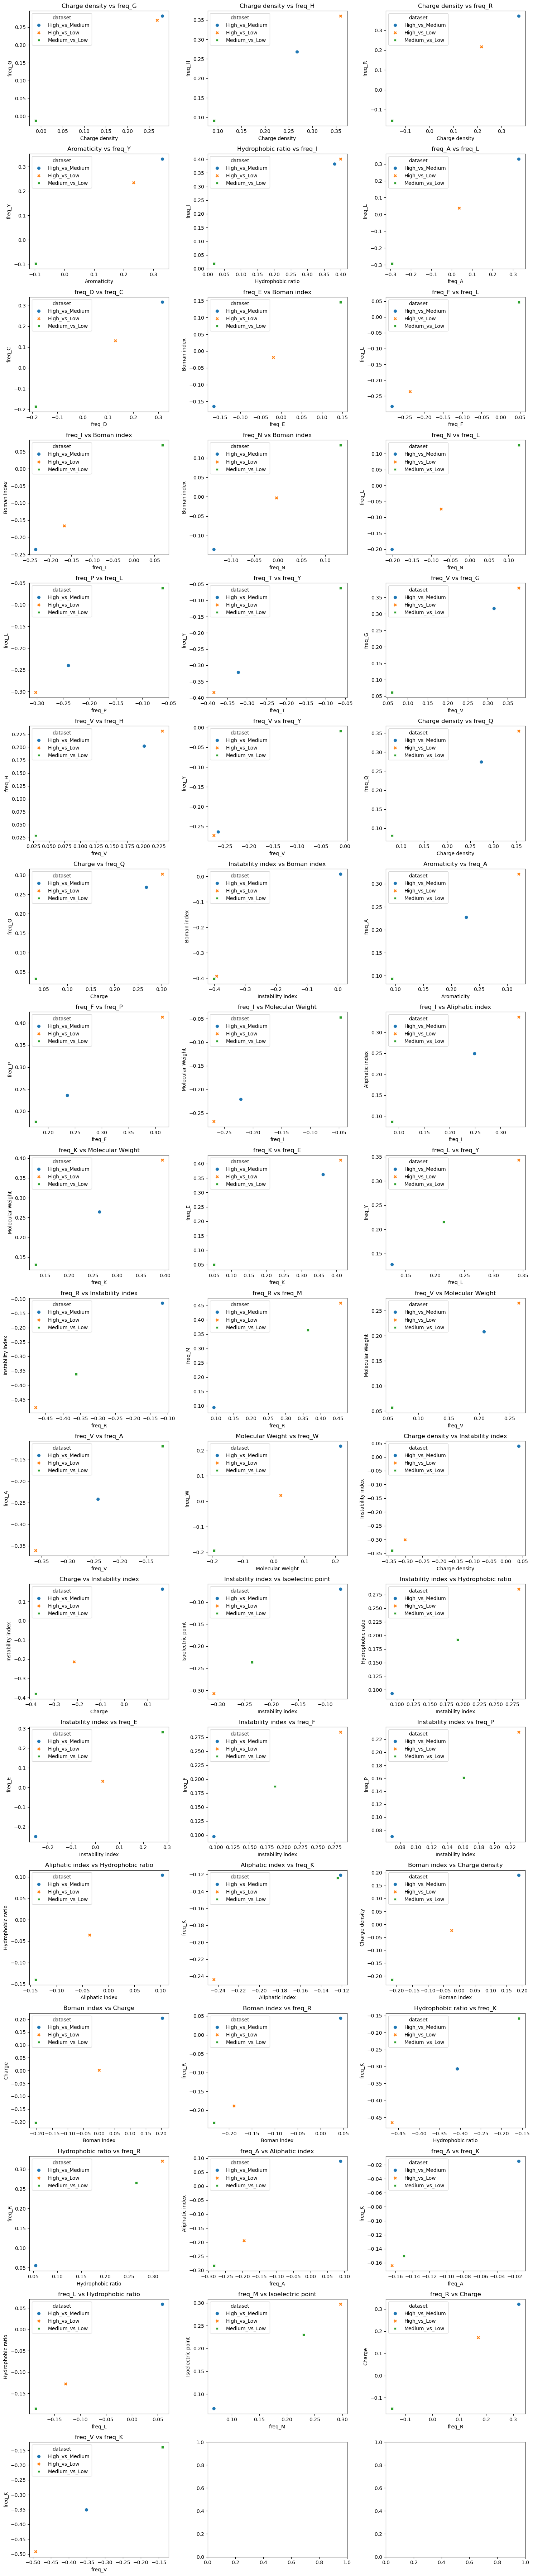

In [96]:
# Obtener combinaciones únicas de atributos
unique_pairs = df_values[['atribute1', 'atribute2']].drop_duplicates()

# Configurar el tamaño del grid de subplots (ajusta según la cantidad de gráficos)
n_rows = (len(unique_pairs) // 3) + 1  # Número de filas (3 gráficos por fila)
n_cols = min(3, len(unique_pairs))  # Máximo 3 gráficos por fila

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Asegurar que el array de ejes es bidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterar sobre cada combinación de atributos y graficar en cada subplot
for idx, (_, row) in enumerate(unique_pairs.iterrows()):
    attr_x = row['atribute1']
    attr_y = row['atribute2']
    
    subset = df_values[(df_values['atribute1'] == attr_x) & (df_values['atribute2'] == attr_y)]

    ax = axes[idx]  # Seleccionar el subplot correspondiente
    
    # Graficar puntos
    sns.scatterplot(data=subset, x="value", y="value", hue="dataset", style="dataset", s=50, ax=ax)
    
    # Agregar línea de tendencia
    #sns.regplot(data=subset, x="value", y="value", scatter=False, color="black", ci=None, ax=ax)

    # Configuración del subplot
    ax.set_title(f"{attr_x} vs {attr_y}")
    ax.set_xlabel(attr_x)
    ax.set_ylabel(attr_y)

# Ajustar layout y mostrar
plt.tight_layout()
plt.savefig(f"../../img/antiviral/stat/property_vs_all.png", dpi=300)
plt.show()